# Calibração de ruído

Rode a célula abaixo e selecione os pontos nos ratos corrigindo o ruído.

Loading keypoints: 100%|██████████████| 120/120 [00:01<00:00, 60.27it/s]


🐀 Iniciando calibração de ruído para o projeto: projects/elm_ms


Loading sample frames: 100%|██████████| 100/100 [00:01<00:00, 85.93it/s]


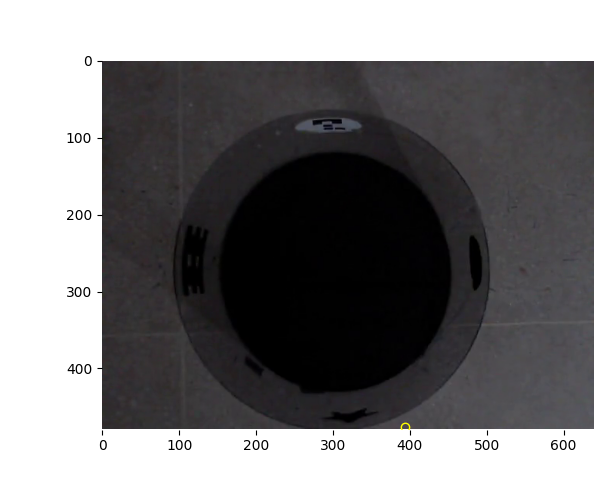

In [2]:
from commands import noise_calibration

project_name = 'elm_ms'
project_dir = f'projects/{project_name}'

%matplotlib widget
noise_calibration(project_dir)